# Barebones example

In [1]:
in_path = 'C:\\Annexe_D\\PER\\data'
in_info_path = 'C:\\Annexe_D\\PER\\in_info'

In [2]:
superclass = {
    "fish": {
        "great_white_shark": "n01484850",
        "goldfish": "n01443537",
        "hammerhead": "n01494475",
        "lionfish": "n02643566",
    },
    "mammal": {
        "grey_whale": "n02066245",
        "killer_whale": "n02071294",
        "Indian_elephant": "n02504013",
        "bison": "n02410509",
        "Arabian_camel": "n02437312",
        "lesser_panda": "n02509815",
        "giant_panda": "n02510455",
        "hippopotamus": "n02398521",
    },
    "bird": {
        "pelican": "n02051845",
        "great_grey_owl": "n01622779",
        "hummingbird": "n01833805",
        "hornbill": "n01829413",
        "bee_eater": "n01828970",
        "coucal": "n01824575",
        "lorikeet": "n01820546",
        "macaw": "n01818515",
        "sulphur-crested_cockatoo": "n01819313",
        "toucan": "n01843383",
        "red-breasted_merganser": "n01855032",
        "goose": "n01855672",
        "black_swan": "n01860187",
        "bald_eagle": "n01614925",
        "hen": "n01514859",
        "albatross": "n02058221",
    },
    "feline": {
        "leopard": "n02128385",
        "lynx": "n02127052",
        "cougar": "n02125311",
        "Siamese_cat": "n02123597",
        "tiger": "n02129604",
        "lion": "n02129165",
        "tiger_cat": "n02123159",
    },
    "canine": {
        "beagle": "n02088364",
        "basset": "n02088238",
    },
    "primate": {
        "indri": "n02500267",
        "capuchin": "n02492035",
        "baboon": "n02486410",
        "macaque": "n02487347",
        "chimpanzee": "n02481823",
        "gorilla": "n02480855",
        "orangutan": "n02480495",
    },
    "reptile": {
        "rock_python": "n01744401",
    },
    "ungulate": {
        "zebra": "n02391049",
    },
    "aquatic": {
        "great_white_shark": "n01484850",
        "goldfish": "n01443537",
        "hammerhead": "n01494475",
        "lionfish": "n02643566",
        "grey_whale": "n02066245",
        "killer_whale": "n02071294",
    },
    "terrestrial": {
        "hippopotamus": "n02398521",
        "Indian_elephant": "n02504013",
        "bison": "n02410509",
        "Arabian_camel": "n02437312",
        "lesser_panda": "n02509815",
        "giant_panda": "n02510455",
        "leopard": "n02128385",
        "lynx": "n02127052",
        "cougar": "n02125311",
        "Siamese_cat": "n02123597",
        "tiger": "n02129604",
        "lion": "n02129165",
        "tiger_cat": "n02123159",
        "beagle": "n02088364",
        "basset": "n02088238",
        "indri": "n02500267",
        "capuchin": "n02492035",
        "baboon": "n02486410",
        "macaque": "n02487347",
        "chimpanzee": "n02481823",
        "gorilla": "n02480855",
        "orangutan": "n02480495",
        "zebra": "n02391049",
        #"rock_python": "n01744401",
    }
}

### Recover ImageNet hierarchy

In [3]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path,
                            in_info_path)

### Probe ImageNet hierarchy

In [4]:
for cnt, (wnid, ndesc_in, ndesc_total) in enumerate(in_hier.wnid_sorted):
    if cnt < 10:
        print(f"WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}, #ImageNet descendants: {ndesc_in}")

WordNet ID: n00001740, Name: entity, #ImageNet descendants: 46
WordNet ID: n00001930, Name: physical entity, #ImageNet descendants: 46
WordNet ID: n00002684, Name: object, physical object, #ImageNet descendants: 46
WordNet ID: n00003553, Name: whole, unit, #ImageNet descendants: 46
WordNet ID: n00004258, Name: living thing, animate thing, #ImageNet descendants: 46
WordNet ID: n00004475, Name: organism, being, #ImageNet descendants: 46
WordNet ID: n00015388, Name: animal, animate being, beast, brute, creature, fauna, #ImageNet descendants: 46
WordNet ID: n01466257, Name: chordate, #ImageNet descendants: 42
WordNet ID: n01471682, Name: vertebrate, craniate, #ImageNet descendants: 42
WordNet ID: n01861778, Name: mammal, mammalian, #ImageNet descendants: 21


In [5]:
ancestor_wnid = 'n02120997'
print(f"Superclass | WordNet ID: {ancestor_wnid}, Name: {in_hier.wnid_to_name[ancestor_wnid]}")
for cnt, wnid in enumerate(in_hier.tree[ancestor_wnid].descendants_all):
    if wnid in in_hier.in_wnids:
        print(f"ImageNet subclass | WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}")

Superclass | WordNet ID: n02120997, Name: feline, felid
ImageNet subclass | WordNet ID: n02129604, Name: tiger, Panthera tigris
ImageNet subclass | WordNet ID: n02127052, Name: lynx, catamount
ImageNet subclass | WordNet ID: n02129165, Name: lion, king of beasts, Panthera leo
ImageNet subclass | WordNet ID: n02128385, Name: leopard, Panthera pardus
ImageNet subclass | WordNet ID: n02125311, Name: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor


### Find desired number of superclasses

### (Or instead) Directly specify superclasses

In [6]:
bird_superclass = list(superclass["bird"].values())
terrestrial_superclass = list(superclass["terrestrial"].values())
aquatic_superclass = list(superclass["aquatic"].values())
allSuperClass = []
for i in range(len(bird_superclass)) :
    allSuperClass.append(bird_superclass[i])
for i in range(len(terrestrial_superclass))  :
    allSuperClass.append(terrestrial_superclass[i])
for i in range(len(aquatic_superclass)) :
    allSuperClass.append(aquatic_superclass[i])
print(allSuperClass)

['n02051845', 'n01622779', 'n01833805', 'n01829413', 'n01828970', 'n01824575', 'n01820546', 'n01818515', 'n01819313', 'n01843383', 'n01855032', 'n01855672', 'n01860187', 'n01614925', 'n01514859', 'n02058221', 'n02398521', 'n02504013', 'n02410509', 'n02437312', 'n02509815', 'n02510455', 'n02128385', 'n02127052', 'n02125311', 'n02123597', 'n02129604', 'n02129165', 'n02123159', 'n02088364', 'n02088238', 'n02500267', 'n02492035', 'n02486410', 'n02487347', 'n02481823', 'n02480855', 'n02480495', 'n02391049', 'n01484850', 'n01443537', 'n01494475', 'n02643566', 'n02066245', 'n02071294']


### Create dataset and loader

In [7]:
import sys, os
dir = "C:\Annexe_D\PER\data\\train"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(dir) if d.is_dir()]
else:
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
classes.sort()
class_to_idx = {classes[i]: i for i in range(len(classes))}
print("class_to_idx")
print(class_to_idx)

class_to_idx
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}


In [8]:
set_bird = {class_to_idx[identifiant] for identifiant in bird_superclass if identifiant in class_to_idx}
set_terrestre = {class_to_idx[identifiant] for identifiant in terrestrial_superclass if identifiant in class_to_idx}
set_aquatic = {class_to_idx[identifiant] for identifiant in aquatic_superclass if identifiant in class_to_idx}

In [9]:
print(set_bird)
print(set_terrestre)
print(set_aquatic)

{3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
{0, 1, 2, 45, 20, 21}


In [10]:
liste_de_sets = [set_bird, set_terrestre, set_aquatic]

In [11]:
print(liste_de_sets)

[{3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}, {0, 1, 2, 45, 20, 21}]


In [12]:
import csv

fichier_txt = "data\words.txt"  # Remplacez par le chemin réel du fichier
correspondance = {}

with open(fichier_txt, 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        if len(row) == 2:
            wnid, label = row
            if wnid in class_to_idx:
                correspondance[class_to_idx[wnid]] = label

# Affichage du dictionnaire obtenu
print(correspondance)
label_map = correspondance

{0: 'goldfish, Carassius auratus', 1: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 2: 'hammerhead, hammerhead shark', 3: 'hen', 4: 'bald eagle, American eagle, Haliaeetus leucocephalus', 5: 'great grey owl, great gray owl, Strix nebulosa', 6: 'rock python, rock snake, Python sebae', 7: 'macaw', 8: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 9: 'lorikeet', 10: 'coucal', 11: 'bee eater', 12: 'hornbill', 13: 'hummingbird', 14: 'toucan', 15: 'red-breasted merganser, Mergus serrator', 16: 'goose', 17: 'black swan, Cygnus atratus', 18: 'pelican', 19: 'albatross, mollymawk', 20: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus', 21: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', 22: 'basset, basset hound', 23: 'beagle', 24: 'tiger cat', 25: 'Siamese cat, Siamese', 26: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 27: 'lynx, catamount', 28: 'leopard, Panth

In [13]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet(in_path,
                                         liste_de_sets)

In [14]:

train_loader, test_loader = custom_dataset.make_loaders(workers=4,
                                                        batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
class_to_idx
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}
aaaaa
['n01443537', 'n01484850', 'n01494475', 'n01514859', 'n01614925', 'n01622779', 'n01744401', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413'

In [15]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    print(lab)

tensor([ 5, 32, 39, 19, 13])
tensor([10,  5, 21,  5, 37])
tensor([41, 45,  9, 43, 19])
tensor([13, 18, 41, 27, 30])
tensor([38, 41,  9, 21, 35])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0016211433..0.8227423].


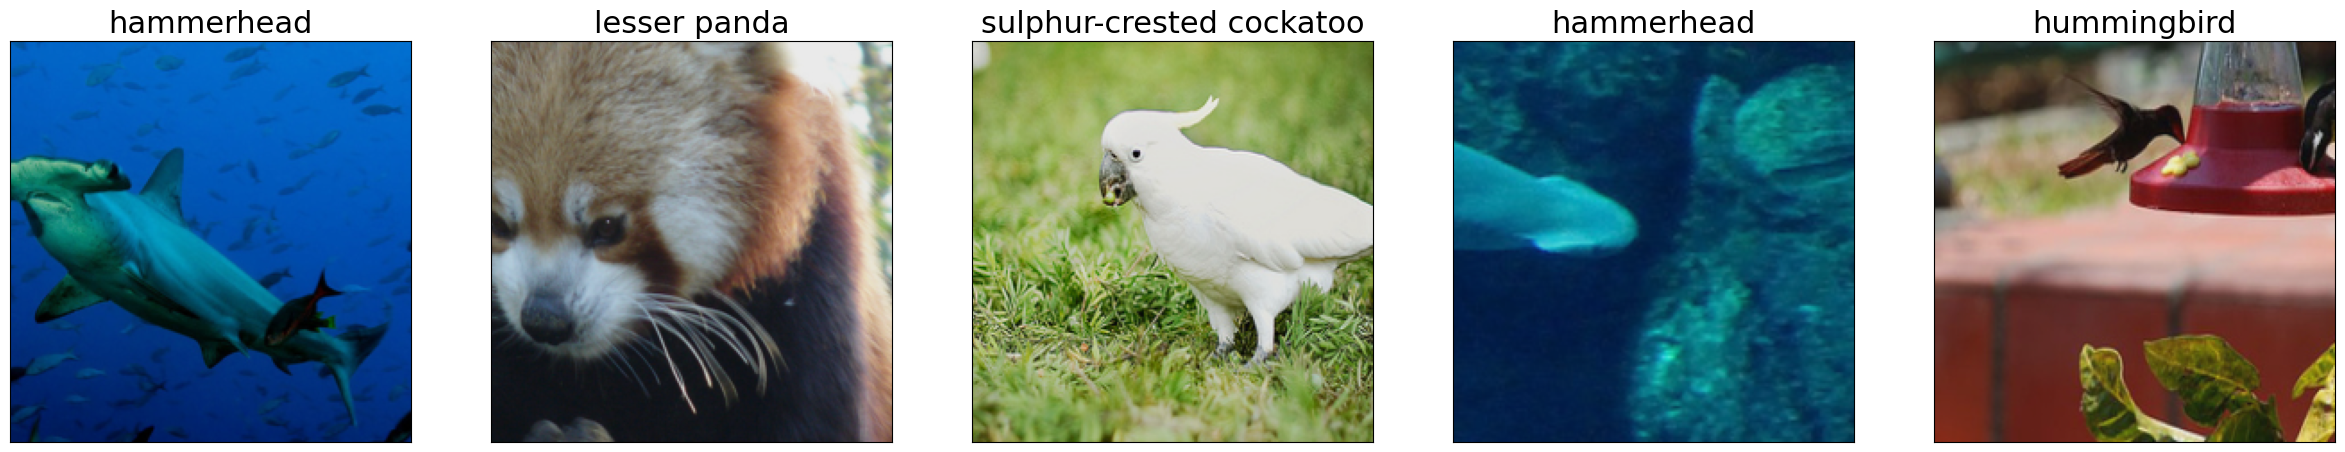

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007995866..1.0001527].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006677495..0.99556094].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0063641826..0.99210525].


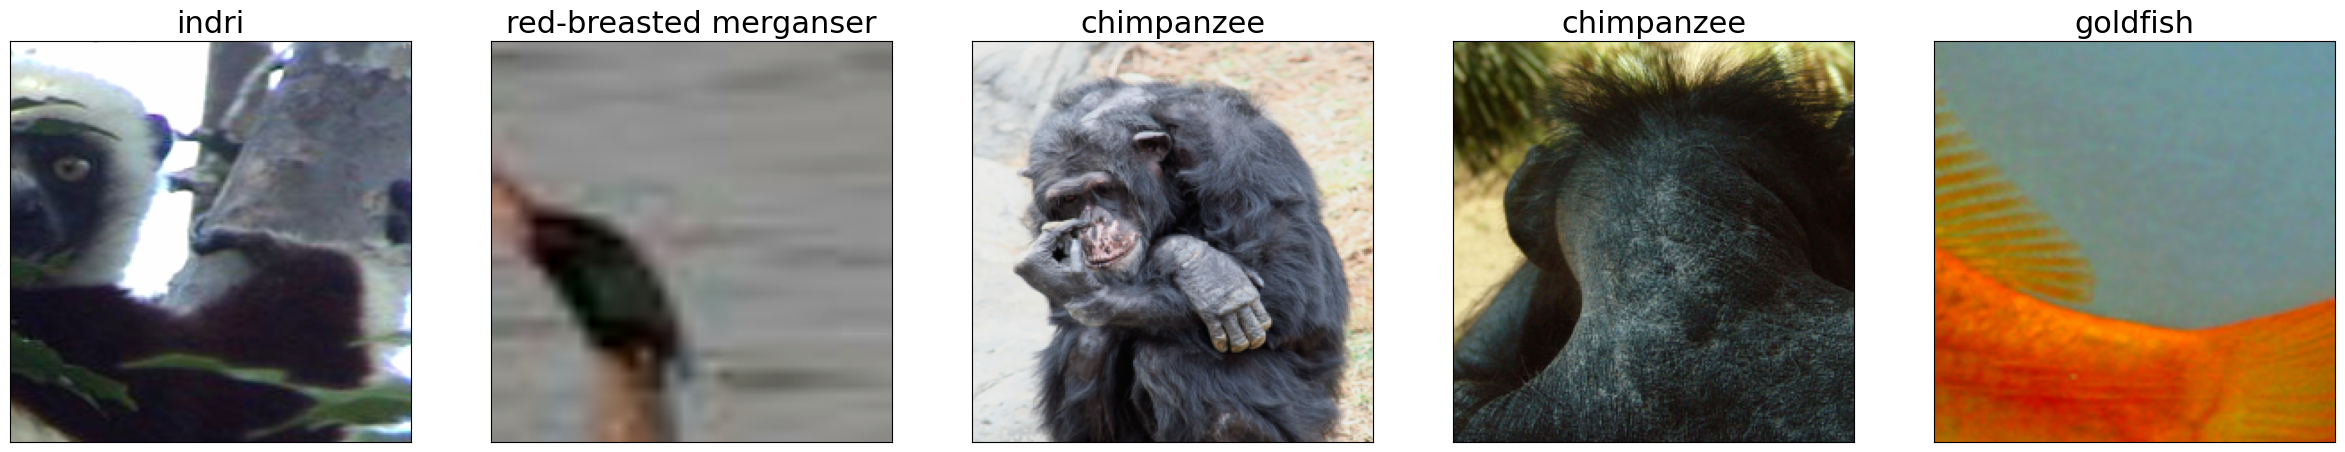

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.014503354..1.0038385].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.021196794..1.001589].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00068868947..1.0020225].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.025037495..1.0054296].


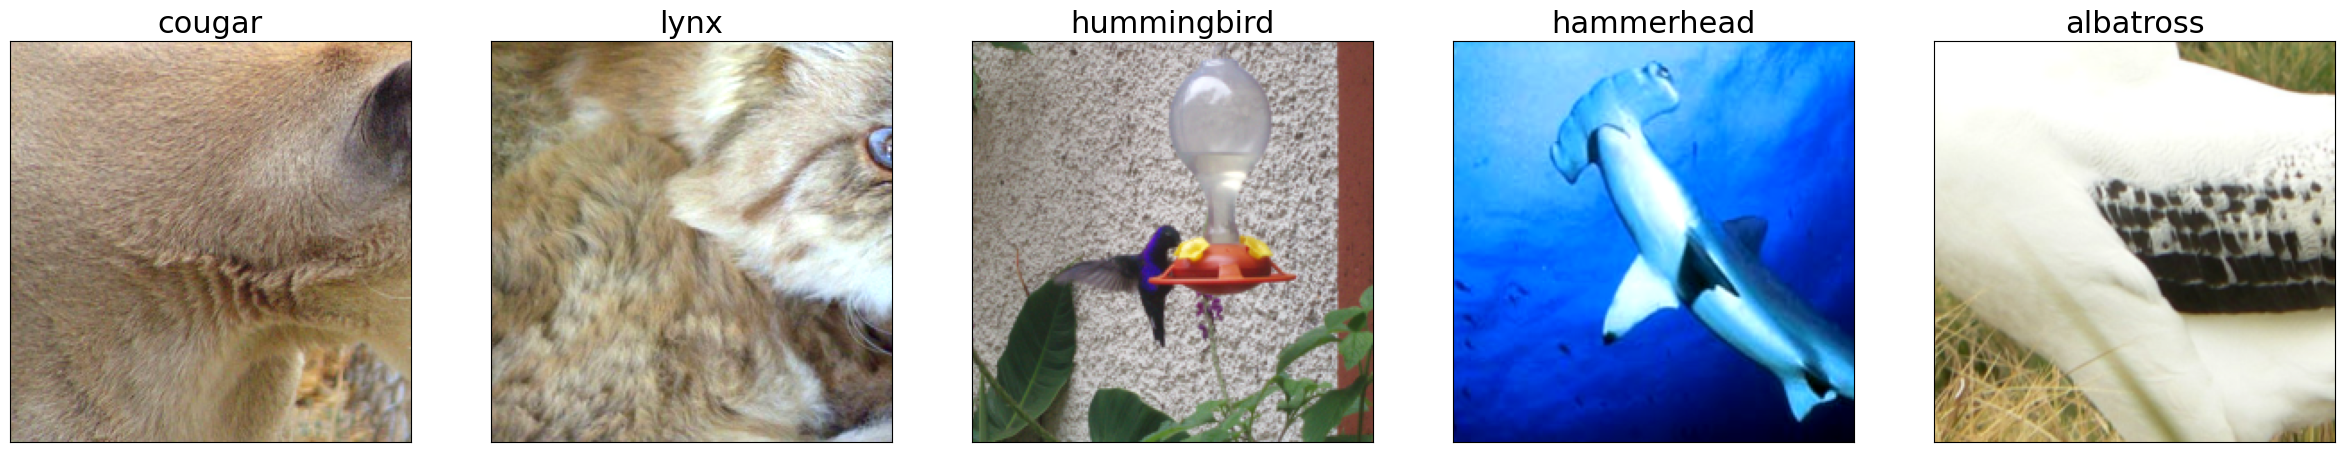

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.009630138..0.99171275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.023869611..1.0052605].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0022747451..0.9987501].


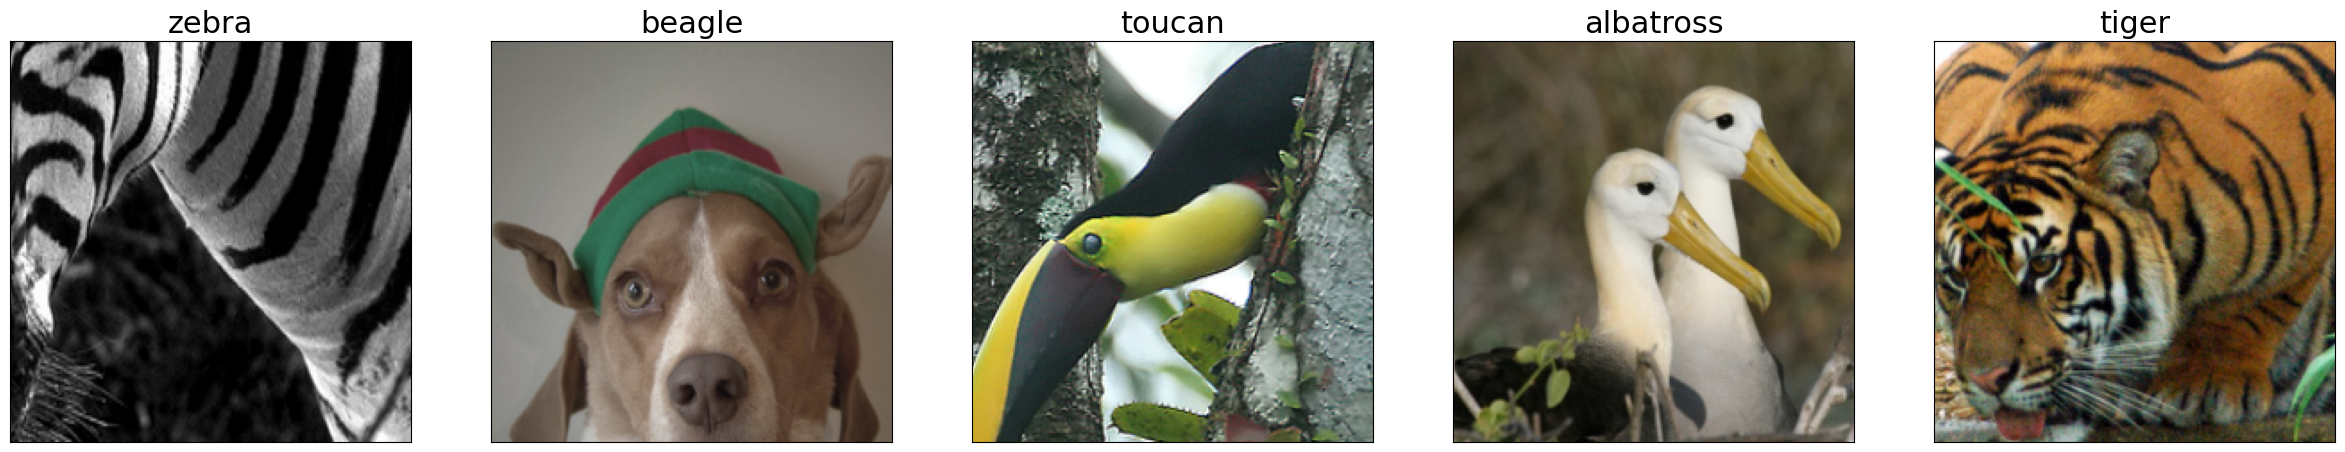

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0020118293..1.0020118].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0028358928..0.94618374].


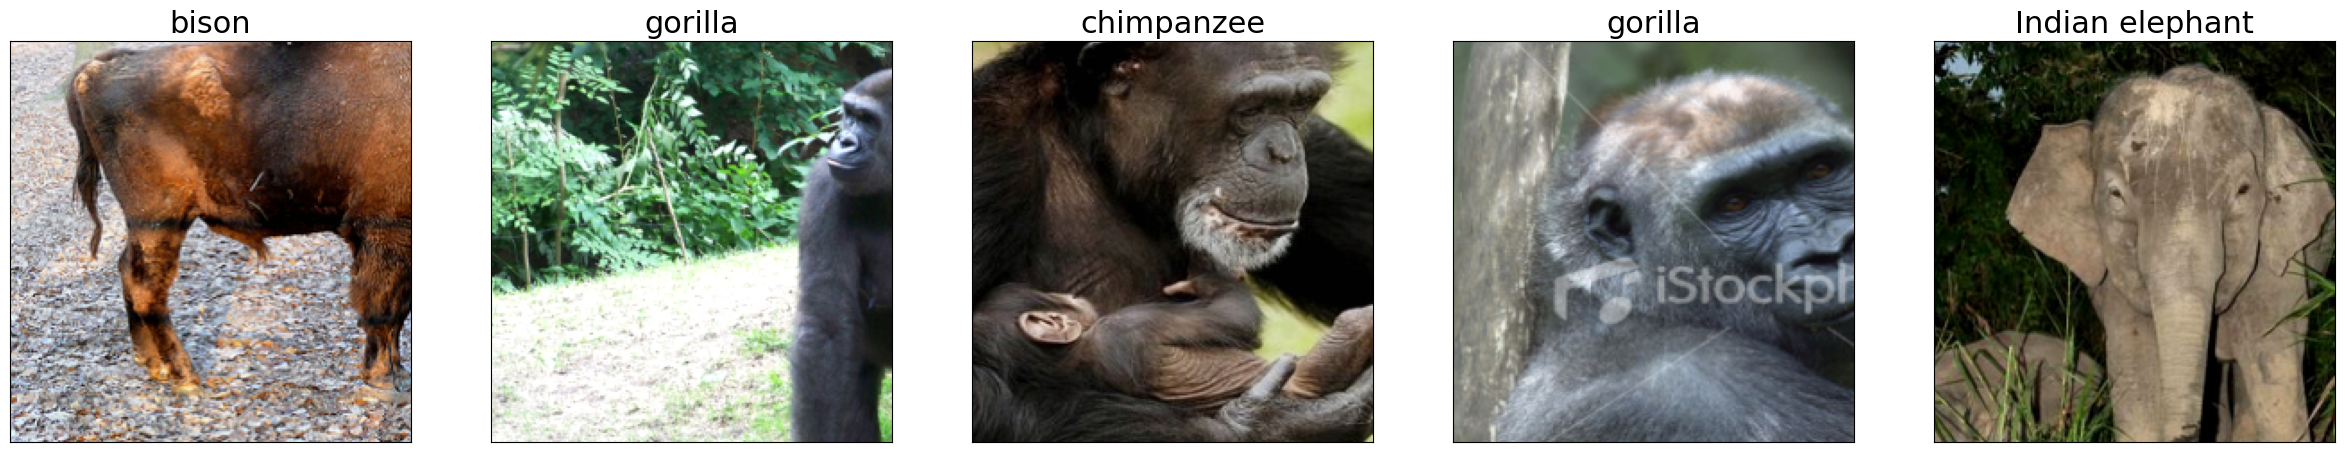

In [16]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    show_image_row([im],
                   tlist=[[label_map[int(k)].split(',')[0] for k in lab]],
                  size=(6, 6),
                  fontsize=22)